In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 400 # This controls the size of your figuresope
InteractiveShell.ast_node_interactivity = "all" 

In [3]:
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('cat.csv'): 
            list_of_files.append(int(filename[:-7]))
set_of_filesDone = []
func = 'cvFeatures4'
clfName = 'GradientBoost'
amount = 4
path =  'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\' + clfName + '\\'

for did in NonCat:
    for amount in amountList:       
        amount2 = round(amount*(readDict(did)['NumberOfFeatures']-1))
        path = path + str(did) + '\\' + str(amount2) + '\\'
        for (dirpath, dirnames, filenames) in os.walk(path):
            for filename in filenames:
                if filename == 'scores0':
                    listDone.append(did) 
                    
               
       
       
            for dirname in dirnames:
                set_of_filesDone.append(int(dirname))
set_of_filesDone = set(set_of_filesDone)
listNeedTodo = []
for i in list_of_files:
    if i not in set_of_filesDone:
        listNeedTodo.append(i)
# openml_list = oml.datasets.list_datasets()

In [10]:
list_of_filesDone = []
for (dirpath, dirnames, filenames) in os.walk('C:\\Users\\S127788\\Documents\\GitHub\\assignment2\did'):
    for filename in filenames:
        if filename.endswith('X.csv'): 
            list_of_files.append(int(filename[:-5]))


In [2]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from Testing import cv_scores_noise2
from LocalDatasets import read_did,saveSingleDict,savePredictsScore,checkForExist
from sklearn.neighbors import *
from Noise2 import shuffle_set
from sklearn.neighbors import *
from sklearn.naive_bayes import GaussianNB
cv = 10
scores = {}
predict = {}
predicts = {}
legend_X = []
MaxClass = []
func = 'cvScoreNoise2'
clfName = 'KNeighborClassifier'
amount = 1000000
amountList = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

i = 30
for amount in amountList:    
    print(i)
    if not checkForExist(func,clfName,amount,i):
        X,y = read_did(i)
    #     X,y = shuffle_set(X,y)#maybe needed
        if (clfName == 'RandomForestClassifier'):
            clf = RandomForestClassifier()
        elif (clfName == 'KNeighborClassifier'):
            clf = KNeighborsClassifier()
        elif (clfName == '1NeighborClassifier'):
            clf =  KNeighborsClassifier(n_neighbors=1)  
        elif (clfName == 'SGDClassifier'):
            clf = SGDClassifier()
        elif (clfName == 'AdaBoost'):
            clf = AdaBoostClassifier()
        elif (clfName[:4] == 'SVC-'):
            clf = SVC(kernel = clfName[4:])
        elif (clfName == 'GaussianNB'):
            clf = GaussianNB()
        elif (clfName == 'BernoulliNB'):
            clf = BernoulliNB()
        elif (clfName == 'MultinomialNB'): # not for negative values
            clf = MultinomialNB()
        tempS,tempG,tempP = cv_scores_noise2(X,y,clf,cv,amount,3)
    #     scores[i] = tempS
    #     predict[i] = tempG
    #     predicts[i] = tempP
        saveSingleDict(tempS,func,clfName,amount,i,'scores')
        saveSingleDict(tempG,func,clfName,amount,i,'SummaryGuesses')
        savePredictsScore(tempP,func,clfName,amount,i,'Predictions')
    #saveSingleDict(tempP,func,clfName,amount,i,'Predictions')
    legend_X.append(i)
    #MaxClass.append(openml_list[i]['MajorityClassSize']/openml_list[i]['NumberOfInstances'])

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from Testing import cv_scores_noise3
from LocalDatasets import read_did,saveSingleDict,savePredictsScore, read_did_cat,checkForExist
from sklearn.neighbors import *
from Noise2 import shuffle_set
from sklearn.naive_bayes import GaussianNB
cv = 10
scores = {}
predict = {}
predicts = {}
legend_X = []
MaxClass = []
func = 'cvScoreNoise3'
clfName = 'GaussianNB'
amount = 182
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]

dids = [182]
for i in dids:
    for amount in amountList[:5]:    
        print(i)
        if not checkForExist(func,clfName,amount,i):
            X,y = read_did(i)
            cat = read_did_cat(i)
        #     X,y = shuffle_set(X,y)#maybe needed
            if (clfName == 'RandomForestClassifier'):
                clf = RandomForestClassifier()
            elif (clfName == 'KNeighborClassifier'):
                clf = KNeighborsClassifier()
            elif (clfName == '1NeighborClassifier'):
                clf =  KNeighborsClassifier(n_neighbors=1)  
            elif (clfName == 'SGDClassifier'):
                clf = SGDClassifier()
            elif (clfName == 'AdaBoost'):
                clf = AdaBoostClassifier()
            elif (clfName[:4] == 'SVC-'):
                clf = SVC(kernel = clfName[4:])
            elif (clfName == 'GaussianNB'):
                clf = GaussianNB()
            elif (clfName == 'BernoulliNB'):
                clf = BernoulliNB()
            elif (clfName == 'MultinomialNB'): # not for negative values
                clf = MultinomialNB()
            tempS,tempG,tempP = cv_scores_noise3(X,y,cat,clf,cv,amount,3)
        #     scores[i] = tempS
        #     predict[i] = tempG
        #     predicts[i] = tempP
            saveSingleDict(tempS,func,clfName,amount,i,'scores')
            saveSingleDict(tempG,func,clfName,amount,i,'SummaryGuesses')
            savePredictsScore(tempP,func,clfName,amount,i,'Predictions')
        #saveSingleDict(tempP,func,clfName,amount,i,'Predictions')
        legend_X.append(i)
        #MaxClass.append(openml_list[i]['MajorityClassSize']/openml_list[i]['NumberOfInstances'])

182
182
182
182
182


In [16]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from Testing import cv_scores_noise4
from LocalDatasets import read_did,saveSingleDict,savePredictsScore,checkForExist
from sklearn.neighbors import *
from Noise2 import shuffle_set
from sklearn.naive_bayes import GaussianNB
cv = 10
scores = {}
predict = {}
predicts = {}
legend_X = []
MaxClass = []
func = 'cvScoreNoise4'
clfName = 'AdaBoost'
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']

amount = 1000000
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]

i = 10
for amount in amountList:
    for clfName in clfNames:
        print(i)
        if not checkForExist(func,clfName,amount,i):
            X,y = read_did(i)
        #     X,y = shuffle_set(X,y)#maybe needed
            if (clfName == 'RandomForestClassifier'):
                clf = RandomForestClassifier()
            elif (clfName == 'KNeighborClassifier'):
                clf = KNeighborsClassifier()
            elif (clfName == '1NeighborClassifier'):
                clf =  KNeighborsClassifier(n_neighbors=1)  
            elif (clfName == 'SGDClassifier'):
                clf = SGDClassifier()
            elif (clfName == 'AdaBoost'):
                clf = AdaBoostClassifier()
            elif (clfName[:4] == 'SVC-'):
                clf = SVC(kernel = clfName[4:])
            elif (clfName == 'GaussianNB'):
                clf = GaussianNB()
            elif (clfName == 'BernoulliNB'):
                clf = BernoulliNB()
            elif (clfName == 'MultinomialNB'): # not for negative values
                clf = MultinomialNB()
            tempS,tempG,tempP = cv_scores_noise4(X,y,clf,cv,amount,3)
        #     scores[i] = tempS
        #     predict[i] = tempG
        #     predicts[i] = tempP
            saveSingleDict(tempS,func,clfName,amount,i,'scores')
            saveSingleDict(tempG,func,clfName,amount,i,'SummaryGuesses')
            savePredictsScore(tempP,func,clfName,amount,i,'Predictions')
        #saveSingleDict(tempP,func,clfName,amount,i,'Predictions')
        legend_X.append(i)
    #MaxClass.append(openml_list[i]['MajorityClassSize']/openml_list[i]['NumberOfInstances'])

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

In [3]:
from clf import clf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from Testing import cv_scores_noise5
from LocalDatasets import read_did,saveSingleDict,savePredictsScore, read_did_cat,checkForExist
from sklearn.naive_bayes import GaussianNB
from Noise2 import shuffle_set
cv = 10
scores = {}
predict = {}
predicts = {}
legend_X = []
MaxClass = []
func = 'cvScoreNoise5'
clfName = 'RandomForestClassifier'
amount = 3
amountList = [0.1,0.5,0.75,1,2,3,5,10,100,1000,10000]
i = 60
for i in listNeedTodo[:5]:    
    print(i)
    if not checkForExist(func,clfName,amount,i):
        X,y = read_did(i)
        cat = read_did_cat(i)
    #     X,y = shuffle_set(X,y)#maybe needed
        if (clfName == 'RandomForestClassifier'):
            clf = RandomForestClassifier()
        elif (clfName == 'KNeighborClassifier'):
            clf = KNeighborsClassifier()
        elif (clfName == '1NeighborClassifier'):
            clf =  KNeighborsClassifier(n_neighbors=1)  
        elif (clfName == 'SGDClassifier'):
            clf = SGDClassifier()
        elif (clfName[:4] == 'SVC-'):
            clf = SVC(kernel = clfName[4:])
        elif (clfName == 'GaussianNB'): # not for negative values
            clf = GaussianNB()
        elif (clfName == 'BernoulliNB'):
            clf = BernoulliNB()
        elif (clfName == 'MultinomialNB'):
            clf = MultinomialNB()
        tempS,tempG,tempP = cv_scores_noise5(X,y,cat,clf,cv,amount,3)
    #     scores[i] = tempS
    #     predict[i] = tempG
    #     predicts[i] = tempP
        saveSingleDict(tempS,func,clfName,amount,i,'scores')
        saveSingleDict(tempG,func,clfName,amount,i,'SummaryGuesses')
        savePredictsScore(tempP,func,clfName,amount,i,'Predictions')
    #saveSingleDict(tempP,func,clfName,amount,i,'Predictions')
    legend_X.append(i)
    #MaxClass.append(openml_list[i]['MajorityClassSize']/openml_list[i]['NumberOfInstances'])v

1176
11
12
1459
1480


In [1]:
from LocalDatasets import read_did,checkForExistFile,saveSingleDict,savePredictsScore,readDict
from Testing import cv_scores_features1
from Noise2 import shuffle_features
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from utils import stopwatch
from sklearn.naive_bayes import GaussianNB
func = 'cvScoreFeatures1'
clfName = 'MultinomialNB'
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
clfNames = ['SVC-rbf']
did = 1067
X,y = read_did(did)
cv = 10
amount = 0.5
information = 3
score = []
dur = []
X = shuffle_features(X)
features = readDict(did)['NumberOfFeatures']
# count = 2
for amount in range(0,len(X[0])):
    print(features-amount)
    with stopwatch() as ws:
        for clfName in clfNames:
            if (clfName == 'RandomForestClassifier'):
                clf = RandomForestClassifier()
            elif (clfName == 'KNeighborsClassifier'):
                clf = KNeighborsClassifier()
            elif (clfName == '1NeighborsClassifier'):
                clf =  KNeighborsClassifier(n_neighbors=1)  
            elif (clfName == 'SGDClassifier'):
                clf = SGDClassifier()
            elif (clfName == 'AdaBoost'):
                clf = AdaBoostClassifier()
            elif (clfName[:4] == 'SVC-'):
                clf = SVC(kernel = clfName[4:])
            elif (clfName == 'GaussianNB'):
                clf = GaussianNB()
            elif (clfName == 'BernoulliNB'):
                clf = BernoulliNB()
            elif (clfName == 'MultinomialNB'):
                clf = MultinomialNB()
        #     print(amount)

            scorings,guessed,predicts,duration = cv_scores_features1(X,y,clf,cv,amount,information)

            count = checkForExistFile(func,clfName,did,amount)
            if count >= 0:
                saveSingleDict(scorings,func,clfName,did,amount,'scores' + str(count))
                saveSingleDict(guessed,func,clfName,did,amount,'SummaryGuesses' + str(count))
                savePredictsScore(predicts,func,clfName,did,amount,'Predictions' + str(count))
                saveSingleDict([duration],func,clfName,did,amount,'duration' + str(count))
            score.append(scorings)
            dur.append(duration)
    print(ws.duration)

22
5.384477909389005
21
5.238059006261888
20
5.401934033494074
19
5.082785851671229
18
4.945996063636784
17
4.963429795535834
16
4.67986516159942
15
5.000839707725731
14
4.699897322405313
13
4.570147550642538
12
4.458033973641577
11
4.39978718074196
10
4.383899444066834
9
4.311896839106872
8
4.2868446256139805
7
4.385470164018244
6
4.287495399101417
5
4.153080117913618
4
3.969052571768188
3
4.007815346405096
2
3.2082120616550753


In [3]:
from LocalDatasets import read_did,checkForExistFile,saveSingleDict,savePredictsScore,readDict
from Testing import cv_scores_features3
from Noise2 import shuffle_features
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from utils import stopwatch
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
func = 'cvScoreFeatures3'
clfName = 'RandomForestClassifier'
did = 6
X,y = read_did(did)
cv = 10
amount = 0.5
information = 3
score = []
dur = []
X = shuffle_features(X)
features = readDict(did)['NumberOfFeatures']
# count = 2
for amount in range(1,features):
    if (clfName == 'RandomForestClassifier'):
        clf = RandomForestClassifier()
    elif (clfName == 'KNeighborsClassifier'):
        clf = KNeighborsClassifier()
    elif (clfName == '1NeighborsClassifier'):
        clf =  KNeighborsClassifier(n_neighbors=1)  
    elif (clfName == 'SGDClassifier'):
        clf = SGDClassifier()
    elif (clfName == 'AdaBoost'):
        clf = AdaBoostClassifier()
    elif (clfName[:4] == 'SVC-'):
        clf = SVC(kernel = clfName[4:])
    elif (clfName == 'GaussianNB'):
        clf = GaussianNB()
    elif (clfName == 'BernoulliNB'):
        clf = BernoulliNB()
    elif (clfName == 'MultinomialNB'):
        clf = MultinomialNB()
#     print(amount)
    with stopwatch() as ws:
        scorings,guessed,predicts,duration = cv_scores_features3(X,y,clf,cv,amount,information)
    print(str(ws.duration) + ',' + str(features-amount))
    count = checkForExistFile(func,clfName,did,amount)
    if count >= 0:
        saveSingleDict(scorings,func,clfName,did,amount,'scores' + str(count))
        saveSingleDict(guessed,func,clfName,did,amount,'SummaryGuesses' + str(count))
        savePredictsScore(predicts,func,clfName,did,amount,'Predictions' + str(count))
        saveSingleDict([duration],func,clfName,did,amount,'duration' + str(count))
    score.append(scorings)
    dur.append(duration)

12.713482393894765,16
11.521543867964358,15
11.716279087125741,14
12.101319134186696,13
12.466795857255285,12
12.842664429934082,11
12.995747813377747,10
13.299525611785398,9
14.616447168622173,8
15.279765889486072,7
15.669950079375724,6
15.990602271036181,5
15.982014860027732,4
16.342260203965026,3
16.283559035884906,2
16.58508921661334,1


In [ ]:
from LocalDatasets import read_did,checkForExistFile,saveSingleDict,savePredictsScore,readDict,read_did_cat
from Testing import cv_scores_features4
from Noise2 import shuffle_features
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from utils import stopwatch
func = 'cvScoreFeatures4'
clfName = 'RandomForestClassifier-Gini'
did = 60
X,y = read_did(did)
cat = read_did_cat(did)
cv = 10
# amount = 0.5
information = 3
score = []
dur = []
X = shuffle_features(X)
features = readDict(did)['NumberOfFeatures']
# count = 2
for amount in range(1,features):
    if (clfName == 'RandomForestClassifier'):
        clf = RandomForestClassifier()
    elif (clfName == 'RandomForestClassifier-Entropy'):
        clf = RandomForestClassifier(criterion = 'entropy')
    elif (clfName == 'RandomForestClassifier-Gini'):
        clf = RandomForestClassifier(criterion = 'gini')
    elif (clfName == 'KNeighborsClassifier'):
        clf = KNeighborsClassifier()
    elif (clfName == '1NeighborsClassifier'):
        clf =  KNeighborsClassifier(n_neighbors=1)  
    elif (clfName == 'SGDClassifier'):
        clf = SGDClassifier()
    elif (clfName == 'AdaBoost'):
        clf = AdaBoostClassifier()
    elif (clfName[:4] == 'SVC-'):
        clf = SVC(kernel = clfName[4:])
    elif (clfName == 'GaussianNB'):
        clf = GaussianNB()
    elif (clfName == 'BernoulliNB'):
        clf = BernoulliNB()
    elif (clfName == 'MultinomialNB'):
        clf = MultinomialNB()
#     print(amount)
    with stopwatch() as ws:
        scorings,guessed,predicts,duration = cv_scores_features4(X,y,cat,clf,cv,amount,information)
    print(str(ws.duration) + ',' + str(features-amount))
    count = checkForExistFile(func,clfName,did,amount)
    if count >= 0:
        saveSingleDict(scorings,func,clfName,did,amount,'scores' + str(count))
        saveSingleDict(guessed,func,clfName,did,amount,'SummaryGuesses' + str(count))
        savePredictsScore(predicts,func,clfName,did,amount,'Predictions' + str(count))
        saveSingleDict([duration],func,clfName,did,amount,'duration' + str(count))
    score.append(scorings)
    dur.append(duration)

7.2780871449867846,40
7.683492852987911,39
7.705805078598132,38
7.589131577708031,37
7.609483570571683,36
7.757828218860595,35
7.972972393001328,34
7.483693727861464,33
7.85402563790376,32
8.10038612199969,31
8.105835774293155,30
8.09887186319611,29
8.250541256555152,28
8.130142287147464,27
8.565386264281187,26
8.329577542319385,25
8.119734206993598,24
8.15046815601454,23
8.207351292649037,22
8.248556299311531,21
8.050652563440963,20
8.109926512264792,19
8.223736170026314,18
8.557309750827699,17
8.539315448659181,16
8.585884271627947,15
8.708686648724324,14
8.673989782717399,13
8.769873247301803,12
8.53931171666045,11
8.722622401419358,10
8.641025030987294,9
8.750838650266815,8
8.71176088332686,7
8.865285546946325,6
8.812566855272962,5
8.868235226063916,4
8.82743514134745,3
8.901010578820205,2
8.88608537975233,1


In [3]:
from completeRun import featureClf
from LocalDatasets import readDict
from utils import stopwatch
did = 1050
cv = 10
amount = 2
typ = 2
features = readDict(did)['NumberOfFeatures']
# count = 2
# amountList = range(1,features)
# NonCat = [20, 21, 26, 333, 334, 335]
# NonCat = [3,20, 21, 26, 333, 334, 335]
# NonCat = [40668, 4135, 4534, 469, 46, 50]
# [3,14,18,20, 21, 26, 333, 334, 335]
# NonCat = [12,14,16,18,22,28,30,32,36,37]
# amountList = [0.125,2]
amountList = [1]
# 0.5,0.6,0.7,0.75,0.8,0.9,
for did in NonCat:
    for amount in amountList:
        with stopwatch() as sws:
            featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
        print(sws.duration)
    

SyntaxError: EOL while scanning string literal (completeRun.py, line 40)

In [9]:
from Testing import cv_scores_missing
from LocalDatasets import read_did,read_did_cat,readDict,saveSingleDict,savePredictsScore
from sklearn.ensemble import RandomForestClassifier
did = 1049
clf = RandomForestClassifier()
cv = 10
amount = 1
information = 3
func = 'TestMissing'
clfName = 'RandomForestClassifier'

X,y = read_did(did)
cat = read_did_cat(did)
amountList = range(1,readDict(did)['NumberOfFeatures']-2)
for amount in amountList:
    scorings,guessed,predicts,time = cv_scores_missing(X,y,cat,clf,cv,amount,information)
    saveSingleDict(scorings,func,clfName,did,amount,'scores')
    saveSingleDict(guessed,func,clfName,did,amount,'SummaryGuesses' )
    savePredictsScore(predicts,func,clfName,did,amount,'Predictions' )
    saveSingleDict([time],func,clfName,did,amount,'duration' )

In [5]:
from completeRun import featureClf
from LocalDatasets import readDict
from utils import stopwatch
did = 32
cv = 10
amount = 2
typ = 2
features = readDict(did)['NumberOfFeatures']
# count = 2
amountList = range(1,features-1)
for amount in amountList:
    with stopwatch() as sws:
        featureClf(did,cv,amount,typ)
    print(sws.duration)

431.7496672658126
430.44641521774247
438.3595451209949
448.62457740542413
444.12371553874436
445.11932713287024
446.7038434822116
455.5374787215733
456.5871171107683
464.10353549608044
461.5775976241857
471.59656195666685
470.78610824858697
472.49994285322464
475.81886151493745


In [4]:
listNeedTodo


[1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 10,
 1120,
 1176,
 11,
 12,
 1459,
 1461,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1480,
 1485,
 1486,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1505,
 1510,
 1515,
 151,
 1570,
 16,
 18,
 20,
 21,
 22,
 23,
 26,
 28,
 300,
 307,
 30,
 312,
 31,
 32,
 333,
 334,
 335,
 36,
 375,
 377,
 37,
 39,
 40499,
 40509,
 40668,
 40,
 4134,
 4135,
 41,
 43,
 44,
 4534,
 4538,
 458,
 469,
 46,
 478,
 479,
 480,
 48,
 50,
 53,
 54]

In [4]:
from metafeatures import *
from landmarking import *
data = oml.datasets.get_dataset(1067)
X, y, categorical = data.get_data(target = data.default_target_attribute, return_categorical_indicator = True)
kaas = simple_metafeatures(X,y, categorical)
stat = statistical_metafeatures(X, y, categorical)
infor = information_theoretic_metafeatures(X, y, categorical)
land = landmarker_metafeatures(X,y,categorical,[])

In [12]:
from completeRun import cv_scores_noise
from LocalDatasets import checkForExist
did = 312
cv = 10
amount = -2
cvScore = 3
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
# amountList = [1.5,2]
amountList = [2,2.1,2.2,2.3,2.4,3,4,5]
# amountList = [-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
amountList = []
for i in range(0,21):
    amountList.append(i-10)
amountList.remove(0)
# amountList = [-10,-9,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10]
func = 'cvScoreNoise' + str(cvScore)
clfName = 'SVC-rbf'
for amount in amountList:
    print(amount)
    if not checkForExist(func,clfName,amount,did):
        cv_scores_noise(did,cv,amount,cvScore)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
1
2
3
4
5
6
7
8
9
10


In [22]:
from LocalDatasets import read_did
from sklearn.ensemble import RandomForestClassifier
from Testing import cv_scores_scales
X,y = read_did(1596)
cv = 10
amount = 512
information = 3
func = 'cvScoreScales'
clf = RandomForestClassifier()
clfName = 'RandomForestClassifier'
tempS,tempG,tempP,duration = cv_scores_scales(X,y,clf,cv,amount,information)
saveSingleDict(tempS,func,clfName,amount,i,'scores')
saveSingleDict(tempG,func,clfName,amount,i,'SummaryGuesses')
savePredictsScore(tempP,func,clfName,amount,i,'Predictions')
saveSingleDict([duration],func,clfName,did,amount,'duration' + str(count))

In [8]:
from completeRun import cv_scores_BrainWebb
did = 1596
cv = 10
amount = 1024
typ = 0
for i in range(3,5):
    print(amount*2**i)
    cv_scores_BrainWebb(did,cv,amount*2**i,typ)

8192
16384


In [15]:
from completeRun import cv_feature
from utils import stopwatch
did = 3
cv = 10
amount = 1
amountList = [0.1,0.4,0.25,0.3,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
# NonCat = [20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
# NonCat = [3]
# amountList = [0.6,0.8,0.9]
# NonCat = [12,14,16,18,22,28,30,32,36,37]
# amountList = [0.7]
NonCat = [40499]
for amount in amountList:
    for did in NonCat:
        print(did)
        with stopwatch() as sw:
            cv_feature(did,cv,amount)
        print(sw.duration)

40499
134.43567272332075
40499
133.04520587630395
40499
131.70314467345088
40499
132.27537503621352
40499
132.08889514007387
40499
132.30145974539118
40499
132.42170971821542
40499
131.8804955045125
40499
132.09797755450563
40499
132.2074885484326
40499
131.90079833252094
40499
132.40989870745034
40499
132.03561683584485
40499
131.93172024726664
40499
131.81889799042983
40499
131.6646331649681


In [9]:
NonCat = [1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54]

In [8]:
# NonCat = [20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
# NonCat = [40668, 4135, 4534, 469, 46, 50]
amountList = [0.5,0.7,1,2,3]
NonCat = [1493]
from completeRun import cv_feature
for amount in amountList:
    for did in NonCat:
        print(did)
        with stopwatch() as sw:
            cv_feature(did,cv,amount)
        print(sw.duration)

1493
17.559939112967186
1493
17.78027441149152
1493
17.468764840397853
1493
17.53490974705619
1493
17.736282457612106


In [12]:
# NonCat = [40668, 4135, 4534, 469, 46, 50]
from utils import stopwatch
from completeRun import featureClf
from LocalDatasets import readDict
amountList = [0.25,0.5,0.75,1]
typ = 2
cv = 10
for did in NonCat:
    for amount in amountList:
        with stopwatch() as sws:
            featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
        print(sws.duration)

486.7391026071639
547.7665079640536
640.0536454018227
731.4295252170148
20.09882526478441
24.623476417593793
29.33690390888023
33.707495036461296
17.687827015084622
19.008306929547416
21.783413384386677
23.282488785388523
7.534990147562894
8.522195973935595
9.703519540667457
10.62228124976673
7.802711939362325
8.889974585189975
10.140757835300064
11.184598849056329
2.5496022638212708
2.7261078394053584
2.948829369966461
3.1762825895489186
6.132961254543716
6.993322081402312
8.039982142457575
8.801754219007762
4.242227677138544
4.651340341999003
5.173688394276269
5.542790460302513
48.42947716772278
54.05089399673079
57.44032091329109
63.012511475850715
574.6967198660964
714.8651951454349
844.8138481791648
986.6442808280526
5.432075561477177
5.618122420266445
5.740015543712616
5.884690562558717
424.22603879770395
511.60530678773193
604.7635862871994
701.2684005463625
151.81044181090692
169.3147942370706
178.3421958619765
195.54051021817213
2.85406403711022
2.9179117497787956
3.0316187666

In [13]:
NonCat = [40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
# 
for did in NonCat:
    for amount in amountList:
        with stopwatch() as sws:
            featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
        print(sws.duration)

1182.6608834912186
1505.7149030244036
1807.7587127827865
2083.1349270770443
48.29879242333118
54.610617867234396
64.57814307679655
71.5125152078399
37.67032774281688
44.87755407646182
52.63574391498696
61.205979384540115
11.738255913340254
12.099455970048439
12.516790195339127
12.865439123881515
63.85384011809947
75.91252789658029
89.16696429238073
101.89371496599051
2.3977403770841192
2.6078440702694934
2.83516387140844
2.982875792105915


In [13]:
glist1 = []
for i in listNeedTodo:
    if readDict(i)['NumberOfFeatures'] == readDict(i)['NumberOfSymbolicFeatures']:
        glist1.append(i)

In [14]:
glist1

[1014,
 1022,
 1025,
 1177,
 1178,
 1179,
 1180,
 1211,
 1236,
 1237,
 1238,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1463,
 1495,
 154,
 1561,
 1562,
 1563,
 1564,
 164,
 184,
 20,
 21,
 23499,
 26,
 333,
 334,
 335,
 336,
 3,
 40515,
 40516,
 40517,
 40518,
 40519,
 40590,
 40591,
 40645,
 40646,
 40647,
 40648,
 40649,
 40650,
 40651,
 40652,
 40653,
 40654,
 40655,
 40656,
 40660,
 40664,
 40668,
 40669,
 40670,
 40677,
 40678,
 40680,
 40681,
 40683,
 40686,
 40687,
 40690,
 40693,
 40695,
 40696,
 40697,
 40702,
 40706,
 40711,
 40714,
 4135,
 444,
 448,
 4534,
 469,
 46,
 50,
 747,
 826,
 835,
 867,
 875,
 953,
 956,
 959,
 991]

In [2]:
blu = [1014,
 1022,
 1025,
 1177,
 1178,
 1179,
 1180,
 1211,
 1236,
 1237,
 1238,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1463,
 1495,
 154,
 1561,
 1562,
 1563,
 1564,
 164,
 184,
 23499]

In [ ]:
for amount in amountList:
    for did in NonCat:
        print(did)
        with stopwatch() as sw:
            cv_feature(did,cv,amount)
        print(sw.duration)

1038
188.2810734127197
1046
8.451020319625968
1049
3.306613708853547
1050
3.4089591634256067
1063
1.218097838536778
1067
2.6676710550964344
1068
1.953188874940679
1120
22.166413120401558
1176
214.98811574772117
11
2.8452192183831357
12
178.39717800907238
1459
70.48649720352842
1462
1.431894487432146
1464
1.0287092745711561
1466
14.576293167592667
1467
1.6057250606754678
1468
225.7339746864236
1475
103.11521963357518
1476
1143.4697477552836
1478
3314.0803669353263
1479
10.120739804617187
1485
69.84841991926805
1487
9.629172142282187
1489
4.124532968708081
1491
436.33331000801263
1492
641.818117991621
1493
427.858124186816
1494
2.867472043428279
1497
39.05640669660352
14
135.70347496002796
1501
139.48772784759058
1504
3.5714051128161373
1510
2.2418472163335537
16
119.29074362530082
18
19.574298852443462
22
90.45445474024746
300
10156.415806078861
32
117.53659579966916
36
23.36482858452655
37
1.1392162598058349
40499
139.32836690547265
40
1.8403908764375956
4134
332.22770320672134
41
4.51

In [ ]:
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]

NonCat = [3,20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
for amount in amountList:
    for did in NonCat:
        print(did)
        with stopwatch() as sw:
            cv_feature(did,cv,amount)
        print(sw.duration)

In [ ]:
from completeRun import featureClf
from LocalDatasets import readDict
from utils import stopwatch
# NonCat = [3,20, 21, 26, 333, 334, 335]
# NonCat = [40668, 4135, 4534, 469, 46, 50]
NonCat = [40668, 4135, 4534, 469, 46, 50]
# NonCat = [12,14,16,18,22,28,30,32,36,37]
# amountList = [0.125,2]
amountList = [0.25,0.5,0.75,1]
cv = 10

# 0.5,0.6,0.7,0.75,0.8,0.9,
for typ in [2,3]:
    for did in NonCat:
        for amount in amountList:
            with stopwatch() as sws:
                featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
            print(sws.duration)

1459.1438572478946


In [1]:
from Testing import optimizeRF,optimizeGBC
from LocalDatasets import readDict
# estimatorRF,cv_scoreRF,durationRF = optimizeRF(1120,readDict(1120)['NumberOfFeatures']-1)
# print(cv_scoreRF)
estimatorGBC,cv_scoreGBC,durationGBC = optimizeGBC(1120,readDict(1120)['NumberOfFeatures']-1)
print(cv_scoreRBC)

NameError: name 'cv_scoreRBC' is not defined

In [11]:
from Testing import optimizeRF,optimizeADA,optimizeGBC
from LocalDatasets import readDict, saveSingleDict,checkForExistFile, saveEstimator
func = 'cvScoreFeaturesOpt1'
clfName = 'GradientBoost'

did = 14
estimator = []
score = []
duration = []
features = readDict(did)['NumberOfFeatures']-1
amountList = [0,0.25,0.5,0.75,1]
for amount in amountList:
    temp1,temp2,temp3 = optimizeGBC(did,round(amount*features))
    estimator.append(temp1)
    score.append(temp2)
    duration.append(temp3)
    count = checkForExistFile(func,clfName,did,amount)
    saveEstimator(str(temp1),func,clfName,did,amount,'estimator' + str(count))
    saveSingleDict([temp2],func,clfName,did,amount,'score' + str(count))
    saveSingleDict([[temp3]],func,clfName,did,amount,'duration' + str(count))

In [5]:
saveSingleDict([temp2],func,clfName,did,amount,'duration' + str(count))
saveSingleDict([[temp3]],func,clfName,did,amount,'duration' + str(count))

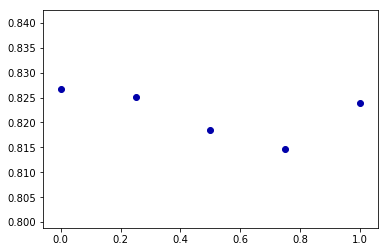

In [13]:
# func = 'cvScoreFeaturesOpt1'
# clfName = 'GradientBoost'
# did = 14
# amountList = [0,0.25,0.5,0.75,1]
# scores = []
# for amount in amountList:
#     scores.append(read_features(func,clfName,did,amount))
scur = []
for i in score:
    scur.append(sum(i)/len(i))
plt.scatter(amountList,scur)
plt.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from scipy.stats import expon
from sklearn.ensemble import RandomForestClassifier
from LocalDatasets import read_did,read_did_cat,readDict
from Noise2 import add_copy_features
from sklearn.svm import SVC
X,y = read_did(21)
amount = len(X[0])
# X = add_copy_features(X,amount)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
param_grid_rbf = {'C': expon(scale=100), 
              'gamma': expon(scale=.1), 'kernel' : ['rbf', 'sigmoid']}
random_searchRBF = RandomizedSearchCV(SVC(), param_distributions=param_grid_rbf,
                                   n_iter=40,n_jobs = 3)
random_searchRBF.fit(X_train, y_train)
print('Found best parameters for RBF kernel',random_searchRBF.best_params_)

print('Accuracy score RBF kernel:',random_searchRBF.best_score_)
# features = len(X_train[0])-1
# param_grid_rbf = {'max_features': range(0,features), 
#               'n_estimators': range(0,features)}
# random_searchRBF = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid_rbf,
#                                    n_iter=40,n_jobs = 3)
# random_searchRBF.fit(X_train, y_train)
# print('Found best parameters for RF',random_searchRBF.best_params_)

# print('Accuracy score RF:',random_searchRBF.best_score_)
# clf = RandomForestClassifier()
# params = {'max_features': range(1,len(X[0])), 'min_samples_split': range(2,20)}
# # 'n_estimators : range(1,len(X[0]))'
# randomRF = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params,
#                                    n_iter=40,n_jobs = 3)
# _=randomRF.fit(X_train, y_train)
# randomRF.best_estimator_
# randomRF.score(X_test,y_test)
# grid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
# grid.fit(X_train,y_train)
# grid.cv_results_
# grid.score(X_test,y_test)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=3,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CBB7240>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CC73208>, 'kernel': ['rbf', 'sigmoid']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

Found best parameters for RBF kernel {'C': 11.990905157516519, 'gamma': 0.25903410202477706, 'kernel': 'rbf'}
Accuracy score RBF kernel: 0.97762345679


In [13]:
from completeRun import optimizeCVclf,optimizeCVclfs
from LocalDatasets import readDict
did = 1515# try 1510 next
amount = 1
cv = 10
# clfName = 'RandomForestClassifier'
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    print(amount,did)
    optimizeCVclfs(did,amount,cv)

0.1 1515
0.25 1515
0.3 1515
0.4 1515
0.5 1515
0.6 1515
0.7 1515
0.8 1515
0.9 1515
1 1515
1.5 1515
2 1515
3 1515
4 1515
5 1515
6 1515


In [3]:
from completeRun import optimizeCVGBC
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
did = 
cv = 10
for amount in amountList:
    print(amount,did)
    optimizeCVGBC(did,amount,cv)

0.5 11
0.6 11
0.7 11
0.75 11
0.8 11
0.9 11
1 11
2 11
3 11
4 11
5 11
6 11


[0.1, 0.4, 0.25, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3, 4, 5, 6]

In [ ]:
1+1

In [4]:
import os
os.remove('hui.txt', dir_fd=None)

In [11]:
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
func = 'cvOptimizeSTD'
clfNames = ['RandomForestClassifier', 'AdaBoost']#,'GradientBoost'
did = 37
initial = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\'
name1 = ['scores0.csv','duration0.csv','Estimators0.txt','Predictions01.csv','Predictions02.csv','Predictions03.csv','Predictions04.csv']
for clfName in clfNames:
    for amount in amountList:
        for name in name1:
            try:
                os.remove(initial  + clfName + '\\' + str(did) + '\\' + str(amount) + '\\' + name, dir_fd=None)
            except FileNotFoundError:
                print(clfName,str(did),str(amount),name)

RandomForestClassifier 37 0.1 scores0.csv
RandomForestClassifier 37 0.1 duration0.csv
RandomForestClassifier 37 0.1 Estimators0.txt
RandomForestClassifier 37 0.1 Predictions01.csv
RandomForestClassifier 37 0.1 Predictions02.csv
RandomForestClassifier 37 0.1 Predictions03.csv
RandomForestClassifier 37 0.1 Predictions04.csv
RandomForestClassifier 37 0.25 scores0.csv
RandomForestClassifier 37 0.25 duration0.csv
RandomForestClassifier 37 0.25 Estimators0.txt
RandomForestClassifier 37 0.25 Predictions01.csv
RandomForestClassifier 37 0.25 Predictions02.csv
RandomForestClassifier 37 0.25 Predictions03.csv
RandomForestClassifier 37 0.25 Predictions04.csv
RandomForestClassifier 37 0.3 scores0.csv
RandomForestClassifier 37 0.3 duration0.csv
RandomForestClassifier 37 0.3 Estimators0.txt
RandomForestClassifier 37 0.3 Predictions01.csv
RandomForestClassifier 37 0.3 Predictions02.csv
RandomForestClassifier 37 0.3 Predictions03.csv
RandomForestClassifier 37 0.3 Predictions04.csv
RandomForestClassifie

In [14]:
from completeRun import optimizeCVclf,optimizeCVclfs
from LocalDatasets import readDict
did = 1510# try 1510 next
amount = 1
cv = 10
# clfName = 'RandomForestClassifier'
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    print(amount,did)
    optimizeCVclfs(did,amount,cv)

0.1 1510
0.25 1510
0.3 1510
0.4 1510
0.5 1510
0.6 1510
0.7 1510
0.8 1510
0.9 1510
1 1510
1.5 1510
2 1510
3 1510
4 1510
5 1510
6 1510


In [1]:
from completeRun import optimizeCVclf,optimizeCVclfs
from LocalDatasets import readDict
did = 1043# try 1510 next
amount = 1
cv = 10
# clfName = 'RandomForestClassifier'
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    print(amount,did)
    optimizeCVclfs(did,amount,cv)

0.1 1043
0.25 1043
0.3 1043
0.4 1043
0.5 1043
0.6 1043
0.7 1043
0.8 1043
0.9 1043
1 1043
1.5 1043
2 1043
3 1043
4 1043
5 1043
6 1043


In [4]:
from completeRun import optimizeCVclf,optimizeCVclfs
from LocalDatasets import readDict
did = 1515# try 1510 next
amount = 1
cv = 10
# clfName = 'RandomForestClassifier'
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    print(amount,did)
    optimizeCVclf(did,amount,cv, 'KNeighborsClassifier')

0.1 1515
0.25 1515
0.3 1515
0.4 1515
0.5 1515
0.6 1515
0.7 1515
0.8 1515
0.9 1515
1 1515
1.5 1515
2 1515
3 1515
4 1515
5 1515
6 1515


In [17]:
1+1

2

In [6]:
print(readDict(1515),readDict(1510))

{'did': 1515, 'name': 'micro-mass', 'format': 'ARFF', 'status': 'active', 'MajorityClassSize': 60, 'MaxNominalAttDistinctValues': -1, 'MinorityClassSize': 11, 'NumberOfClasses': 20, 'NumberOfFeatures': 1301, 'NumberOfInstances': 571, 'NumberOfInstancesWithMissingValues': 0, 'NumberOfMissingValues': 0, 'NumberOfNumericFeatures': 1300, 'NumberOfSymbolicFeatures': 1} {'did': 1510, 'name': 'wdbc', 'format': 'ARFF', 'status': 'active', 'MajorityClassSize': 357, 'MaxNominalAttDistinctValues': -1, 'MinorityClassSize': 212, 'NumberOfClasses': 2, 'NumberOfFeatures': 31, 'NumberOfInstances': 569, 'NumberOfInstancesWithMissingValues': 0, 'NumberOfMissingValues': 0, 'NumberOfNumericFeatures': 30, 'NumberOfSymbolicFeatures': 1}


In [7]:
from LocalDatasets import readDict
listNeedCat = []
for did in listNeedTodo:
    if readDict(did)['NumberOfSymbolicFeatures'] == 1:
        listNeedCat.append(did)
    

In [6]:
from LocalDatasets import readDict
readDict(10)

{'MajorityClassSize': 81,
 'MaxNominalAttDistinctValues': 8,
 'MinorityClassSize': 2,
 'NumberOfClasses': 4,
 'NumberOfFeatures': 19,
 'NumberOfInstances': 148,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 3,
 'NumberOfSymbolicFeatures': 16,
 'did': 10,
 'format': 'ARFF',
 'name': 'lymph',
 'status': 'active'}

In [8]:
ListNonCat = [1036,
 1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 182,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40496,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54,
 60,
 6]
typ == 2
for 

[1036,
 1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 182,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40496,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54,
 60,
 6]

In [10]:
func = 'cvScoreFeatures4'
clfName = 'GradientBoost'
path =  'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\' + clfName + '\\'
amountList = [0.25,0.5,0.75,1]
listDone = []
for did in NonCat:
    for amount in amountList:       
        amount2 = round(amount*(readDict(did)['NumberOfFeatures']-1))
        path = path + str(did) + '\\' + str(amount2) + '\\'
        for (dirpath, dirnames, filenames) in os.walk(path):
            for filename in filenames:
                if filename == 'scores0':
                    listDone.append(did)

listDone = set(listDone)

for i in listDone:
    NonCat.remove(i)

In [ ]:
NonCat

In [16]:
1+1

2

In [ ]:
for typ in [2,3]:
    for did in NonCat[16:]:
        for amount in amountList:
            with stopwatch() as sws:
                featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
            print(sws.duration)

In [ ]:
amountList = [0.3,0.5,0.6,0.7,0.8,0.9,1,1,1.5,2,3,4,5,6]
for amount in amountList:
    for did in NonCat:
        print(did)
        with stopwatch() as sw:
            cv_feature(did,cv,amount)
        print(sw.duration)